In [1]:
#import points_generator.points_generator as pg

import pygame
import numpy as np


def generate(width: int, height: int):
    points = np.empty((0, 2), dtype='f')

    c_radius = 2
    c_color = (0, 0, 255)
    c_thickness = 0

    bg_color = (255, 255, 255)
    screen = pygame.display.set_mode((width, height))
    pygame.display.set_caption('Points Generator')

    running = True
    pushing = False

    while running:

        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                running = False
            elif event.type == pygame.MOUSEBUTTONDOWN:
                pushing = True
            elif event.type == pygame.MOUSEBUTTONUP:
                pushing = False
        if pushing:
            (x, y) = pygame.mouse.get_pos()
            # coord = [x, y]
            r = np.random.uniform(0, 20)
            t = np.random.uniform(0, 2 * np.pi)
            coord = [x + r * np.cos(t), height - (y + r * np.sin(t))]  # Отражение относительно оси Х
            if coord not in points:  # Если значение уникально, то добавляем
                points = np.append(points, [coord], axis=0)

        screen.fill(bg_color)
        for point in points:
            # При отрисовке отражаем обратно
            pygame.draw.circle(screen, c_color, (int(point[0]), height - int(point[1])), c_radius, c_thickness)
        pygame.display.flip()

    pygame.quit()
    return points

points = generate(480, 480)

pygame 2.0.1 (SDL 2.0.14, Python 3.8.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [7]:
import numpy as np

class C_Means():
   
    def __init__(self, dataset, n_clusters=3, fuzzy=2, cut=.9):
        self.dataset = dataset
        self.n_clusters = n_clusters
        self.fuzzy = fuzzy
        self.cut = cut
        self.max_n_iter = 100
        self.tolerance = 1e-2
        self.fitted = False
        self.labels = np.array([], dtype='i')
        self.centroids = self.dataset[np.random.choice(self.dataset.shape[0], size=self.n_clusters, replace=False)]
        self.U = np.array([], dtype='f')
       
    def get_dist(self, list1, list2):
        return np.linalg.norm(np.array(list1) - np.array(list2))
   
    def distribute_data(self):
        #
        # Метод пересчета матрицы принадлежности U
        #
        dist = np.array([[self.get_dist(center, data) for center in self.centroids] for data in self.dataset])    
        dist[(dist[ : , : ] == 0)] = np.finfo(float).eps
        U = (1/dist)**self.fuzzy
        self.U = U/np.array([U.sum(axis=1)]).T
        
            
    def recalculate_centroids(self):
        #
        # Метод пересчета центров кластеров с помощью матрицы принадлежности
        #
        self.centroids = (self.U.T @ self.dataset)/(np.array([self.U.sum(axis=0)]).T)
        
    def get_labels(self):
        #
        # Метод заполнения массива меток (labels) обучающей выборки
        #    с использованием параметра отсечения (cut)
        #
        self.labels = np.array([(x.argmax() + 1) if x.max() >= self.cut else 0 for x in self.U])
    
    def fit(self):
        #
        # Метод обучения модели
        #
        iter = 0
        while iter < self.max_n_iter:
            prev_centroids = self.centroids.copy()
            self.distribute_data()
            self.recalculate_centroids()
            if np.array([self.get_dist(i,j) for i,j in zip(prev_centroids,self.centroids)]).max()\
            < self.tolerance:
                print(iter)
                break
            iter += 1
        self.fitted = True
        self.get_labels()
       
    def predict(self, list2d):
        #
        # Метод предсказания меток для массива новых объектов
        #
        if not self.fitted: self.fit()
            
        dist = np.array([[self.get_dist(center, data) for center in self.centroids] for data in list2d])  
        dist[(dist[ : , : ] == 0)] = np.finfo(float).eps
        U = (1/dist)**self.fuzzy
        U = U/np.array([U.sum(axis=1)]).T
        return np.array([x.argmax() + 1 if x.max() >= self.cut else 0 for x in U])
    

In [8]:
model = C_Means(points)

model.fit()

7


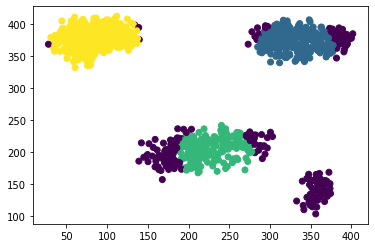

In [9]:
import matplotlib.pyplot as plt

plt.scatter(points[:,0],points[:,1], c=model.labels)

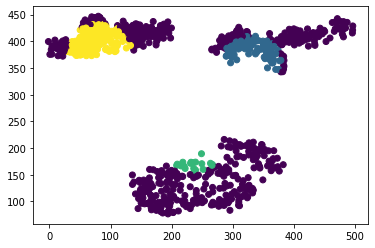

In [10]:
test_pts = generate(480, 480)
plt.scatter(test_pts[:,0],test_pts[:,1], c=model.predict(test_pts))